### Introducción y Objetivo

El dataset revela el número de accidentes de tráfico ocurridos en Canadá desde el año 1999 hasta el 2014. 

El objetivo de este estudio es encontrar un modelo que prediga, dado un conductor que sufre un accidente, si habrá fallecimientos o no.

Este cálculo determinará el capital preciso para que las compañias aseguradoras en este caso puedan hacer frente a las coberturas indemnizatorias por tales siniestros.

La dotación errónea de esa partida afectaría a la cuenta empresarial de resultados. Por exceso, al distorsionar la cifra de gastos del balance, inmovilizando recursos para atender inversiones rentables. Por defecto, al generar desajustes de tesorería, con las consiguientes consecuencias jurídicas derivadas de situaciones de iliquidez (concurso de acreedores) o ejecuciones judiciales (embargos). Y todo ello al margen de las sanciones administrativas (multas) por parte de la dirección general de seguros al incumplir la normativa sobre provisiones técnicas.

## Analisis Exploratio de Datos

In [2]:
!Conda info


     active environment : practica_ml
    active env location : /Users/JuditLozano/opt/anaconda3/envs/practica_ml
            shell level : 2
       user config file : /Users/JuditLozano/.condarc
 populated config files : /Users/JuditLozano/.condarc
          conda version : 4.10.3
    conda-build version : 3.21.6
         python version : 3.8.12.final.0
       virtual packages : __osx=10.16=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/JuditLozano/opt/anaconda3  (writable)
      conda av data dir : /Users/JuditLozano/opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/JuditLozano/opt/anaconda3/pkgs
              

### Libraries

In [16]:
#primero todas las librerías porbloques
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from dython.nominal import associations
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings
import pickle
warnings.filterwarnings("ignore")

#opciones de visualización
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

### Funciones

### Cargamos los datos

In [121]:
list_columns = ['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER']

data = pd.read_csv("../data/NCDB_1999_to_2014.csv").loc[:, list_columns]

data.shape

(5860405, 21)

In [122]:
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3


### Diccionario de datos

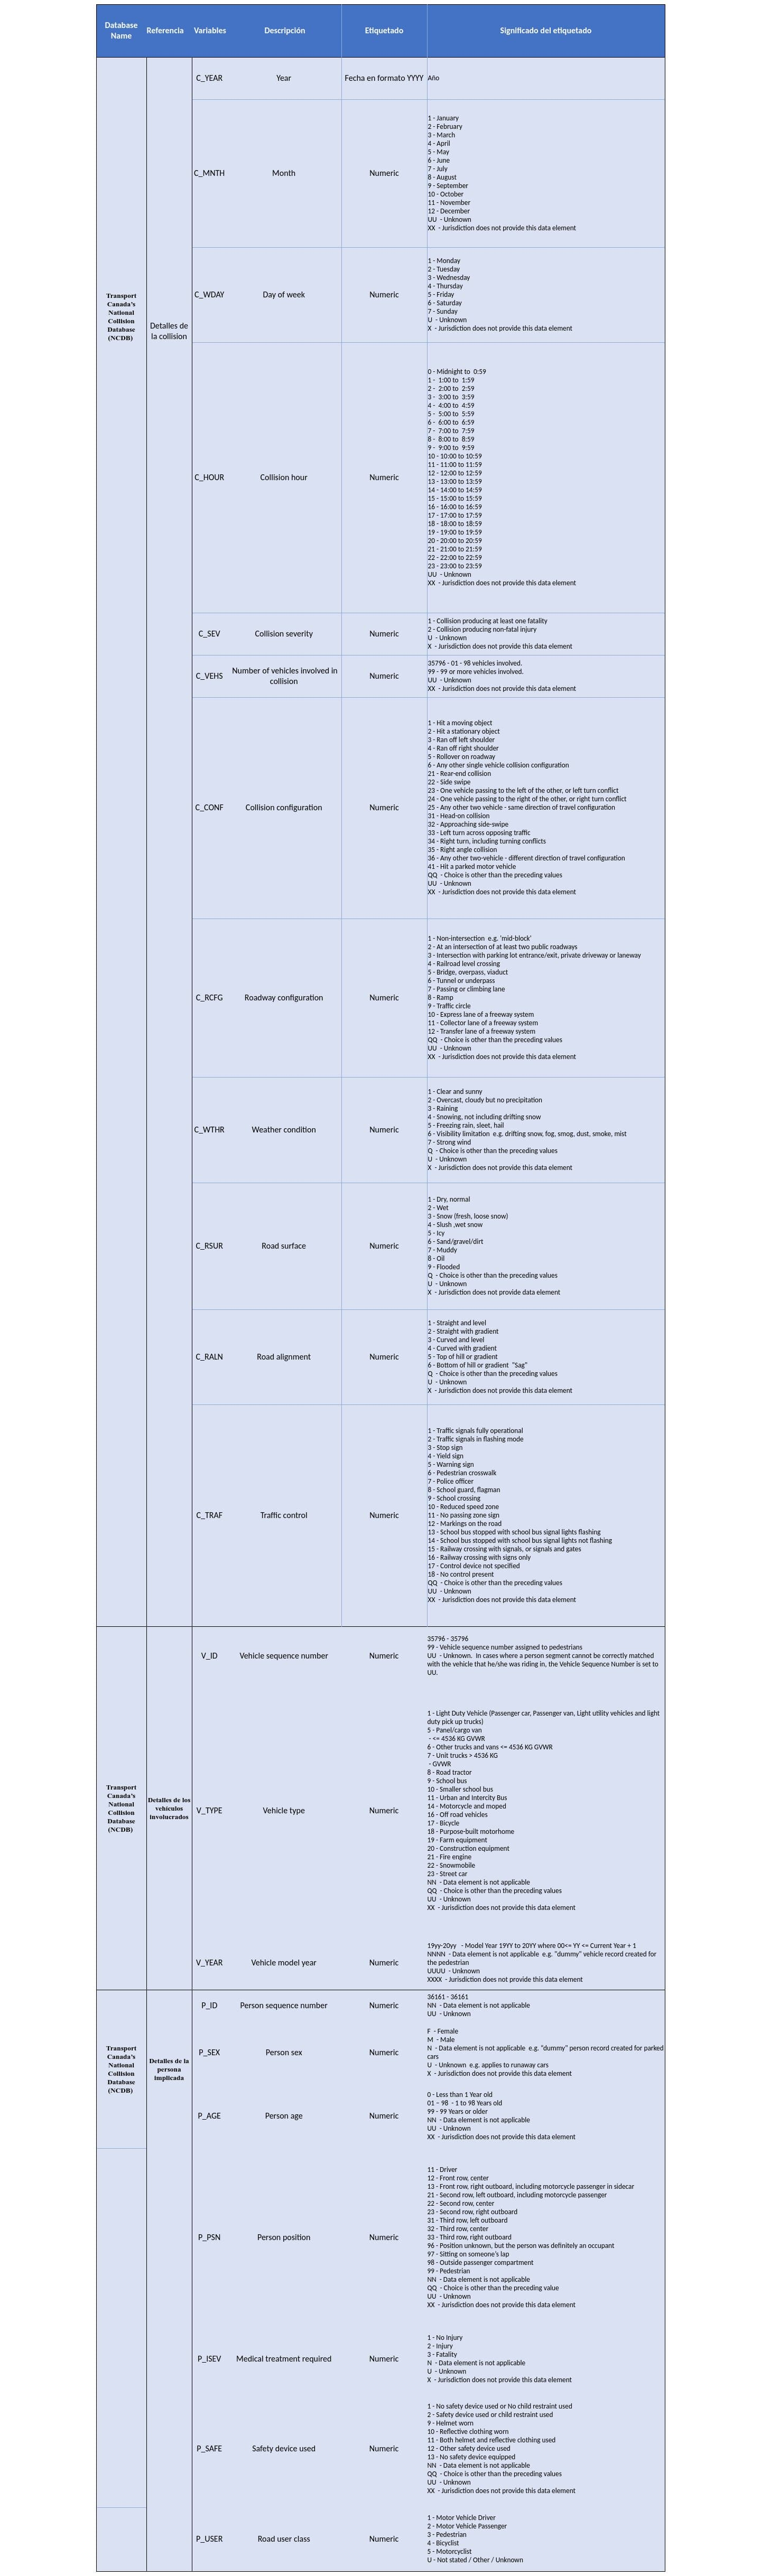

In [77]:
from IPython.display import Image
Image(filename='../images/diccionario_datos-2.jpg')

Observamos los tipos de las variables del dataset y el nombre de las columnas

In [78]:
data.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

In [123]:
df_data = data

Nos hacemos una idea del tipo de valores unicos que tenemos en cada columna y observamos que son etiquetas, es decir no son valores numéricos que se puedan fraccionar. Por lo tanto, pasamos a unificar los valores de las variables a enteros para facilitar la visualización del dataset más adelante.

In [124]:
for col in df_data:
    print(df_data[col].name, df_data[col].unique())

C_YEAR [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014]
C_MNTH [1 2 3 4 5 6 7 8 9 10 11 12 '12' 'UU' '01' '02' '11']
C_WDAY [1 2 3 4 5 6 7 '7' 'U' '1' '2' '3' '4' '5' '6']
C_HOUR ['20' '08' '17' '15' '14' '01' '11' '13' '19' '16' '09' '02' '18' '12'
 '10' '23' '00' '06' '07' '21' 'UU' '05' '22' '03' '04']
C_SEV [2 1]
C_CONF ['34' '01' 'QQ' '04' '31' '21' '23' '03' '02' '33' 'UU' '24' '35' '41'
 '06' '32' '36' '05' '22' '25']
C_RCFG ['UU' 'QQ' '01' '02' '03' '05' '04' '06' '08' '07' '09' '10']
C_WTHR ['1' '5' '3' '4' '7' '2' 'U' '6' 'Q']
C_RSUR ['5' '3' '2' '4' '1' '6' 'U' 'Q' '7' '9' '8']
C_RALN ['3' '6' '1' 'U' '2' '5' '4' 'Q']
C_TRAF ['03' '18' '01' 'UU' '06' '10' '05' '04' '11' 'QQ' '07' '08' '16' '17'
 '02' '13' '15' '09' '12']
V_ID ['01' '02' '99' '03' '04' 'UU' '05' '06' '07' '08' '09' '10' '11' '12'
 '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26'
 '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40'
 '41' 

In [125]:
unknowns_a = {'UU' : 50, 'XX' : 51, 'U' : 52, 'X' : 53, 'NN' : 54, 'Q' : 55, 'QQ' : 56}
unknowns_year = { 'UUUU' : 2100,'XXXX' : 2101, 'NNNN' : 2102}
unknowns_age = {'UU' : 150, 'XX' : 151, 'NN' : 152, 'QQ' : 153}
unknowns_sex = {'U' : 8, 'N' : 9, 'M' : 0, 'F' : 1}

In [126]:
df_data.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_CONF', 'C_RCFG',
       'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR',
       'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

In [127]:
col_cat_a = ['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_CONF',
             'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', "V_TYPE", "P_SAFE", "P_PSN"]
col_cat_year = ["V_YEAR", 'C_YEAR']
col_cat_age = ["P_AGE","P_ID", "V_ID"]
col_cat_sex = ["P_SEX","P_USER","P_ISEV"]

In [128]:
df_col_a = df_data[col_cat_a].replace(unknowns_a).astype(int)
df_col_year = df_data[col_cat_year].replace(unknowns_year).astype(int)
df_col_age = df_data[col_cat_age].replace(unknowns_age).astype(int)
df_col_sex = df_data[col_cat_sex].replace(unknowns_sex).astype(int)
df_data = pd.concat([df_col_a, df_col_year, df_col_age, df_col_sex, df_data['C_SEV']], axis=1).reset_index(drop=True)
df_data.shape

(5860405, 21)

En el dataset cada fila corresponde a una persona que estuvo involucrada en un accidente. Es decir, cada registro puede hacer referencia al conductor, a alguien que viajaba en la segunda fila o incluso a un peatón que pasaba por alli.  

Dado que el objetivo de este estudio es centrarse en los conductores desde el punto de vista de las compañias aseguradoras, crearemos una nueva variable que identifique a los conductores según la clase 'driver' de la variable P_PSN e introduciremos nuevas variables que puedan aportar valor al análisis como por ejemplo número de ocupantes por vehículo en el momento del accidente.

In [129]:
#identifico las filas de tipo 'conductor'
df_data['DRIVERS'] = np.where(df_data['P_PSN']==11,1,0) #identifico las filas de tipo 'conductor'

In [130]:
#identifico con un unico ID las filas pertenecientes al mismo accidente
df_data['ACCIDENT_ID'] = df_data.groupby(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']).ngroup()

In [131]:
#identifico el numero de personas que viajaba en el mismo coche
df_data['PP_CAR'] = df_data.groupby(['ACCIDENT_ID','V_ID']).ngroup()
df_data['PP_CAR'] = df_data.groupby('PP_CAR')['PP_CAR'].transform('count')

A continuación, filtraremos fuera del dataset a los no conductores y crearemos nuestra variable 'Target' que identifica a los conductores involucrados en un accidente donde hubo algún fallecido con un 1 y conductores que tuvieron un accidente pero sin fallecidos con un 0.

Además dejaremos fuera del data set las variables que no vamos a utiliar que son las siguientes: ['C_CONF', 'P_PSN', 'P_ID', 'V_ID','P_USER',"P_ISEV", 'C_SEV', 'ACCIDENT_ID', 'DRIVERS']

Tal exclusión obedece bien a que no aportan valor (como los IDs), bien a que reflejan datos inútiles para la predicción. Y ello, al no estar disponibles con antelación a la producción de un accidente del asegurado. Es decir, al momento de la implantación del modelo pretendido.

In [132]:
mask_drivers = df_data['DRIVERS']==1 #creo una máscara con las filas de tipo 'conductor'
df_data = df_data[mask_drivers] #filtro para ver solo los registros de tipo conductor
df_data['TARGET'] = np.where(df_data['C_SEV']==1,1,0) #identifico a los conductores involucrados en un accidente donde hubo algún fallecido

In [133]:
df_data.columns

Index(['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR',
       'C_RALN', 'C_TRAF', 'V_TYPE', 'P_SAFE', 'P_PSN', 'V_YEAR', 'C_YEAR',
       'P_AGE', 'P_ID', 'V_ID', 'P_SEX', 'P_USER', 'P_ISEV', 'C_SEV',
       'DRIVERS', 'ACCIDENT_ID', 'PP_CAR', 'TARGET'],
      dtype='object')

In [134]:
df_data = df_data.drop(['C_CONF', 'P_PSN', 'P_ID', 'V_ID','P_USER',"P_ISEV", 'C_SEV', 'ACCIDENT_ID', 'DRIVERS'], axis= 1)
df_data.shape

(3926086, 16)

### Exploración de la variable objetivo

Aqui se observa un desbalanceo significanivo de los datos ya que tan solo un 1.46% de los conductores ha estado involucrado en algun accidente donde hubo al menos un fallecido. Este desbalanceo se tratará más adelante.

In [135]:
df_plot_target = df_data['TARGET'] \
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()
        
df_plot_conteo = df_data['TARGET'].value_counts().rename('conteo').reset_index()


df_plot_fatalities = pd.merge(df_plot_target, df_plot_conteo, on=['index'], how='inner')
df_plot_fatalities

,index,percent,conteo
0,0,98.543155,3868889
1,1,1.456845,57197


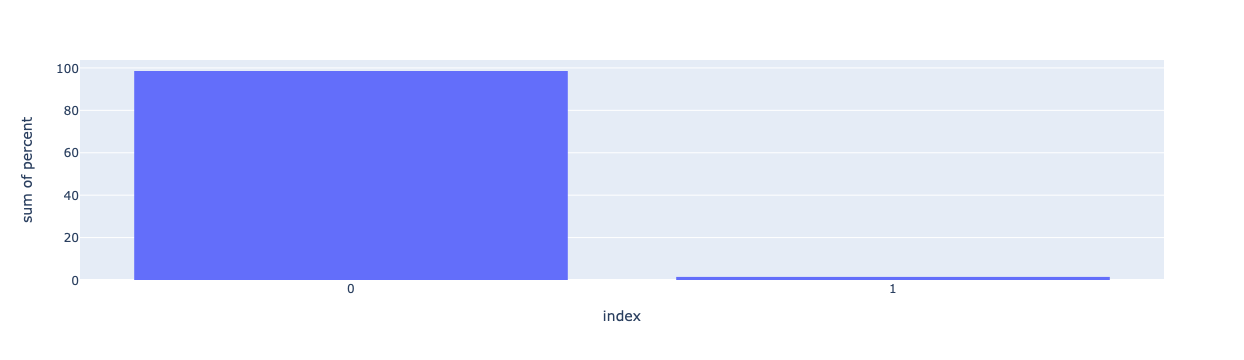

In [136]:
fig = px.histogram(df_plot_fatalities, x='index', y='percent')
fig.update_xaxes(type='category')
fig.show()

Observamos si hay alguna columna duplicada en el dataframe

In [137]:
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups 
    dups = []
    
    for t, v in groups.items():
        cs = frame[v].columns 
        vs = frame[v]
        lcs = len(cs)
        
        for i in range(lcs):
            ia = vs.iloc[:,i].values 
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values 
                if np.array_equal(ia, ja):
                    dups.append(cs[i]) 
                    break
                
    return dups

In [138]:
duplicate_cols = duplicate_columns(df_data)
duplicate_cols

[]

### Preprocesamiento inicial de las variables:
Observamos que no hay valores nulos en el dataset.

In [140]:
#analizarnulos
df_dtypes = pd.merge(df_data.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(), 
                     df_data.dtypes.to_frame('feature_type').reset_index(),
                     on = 'index', how = 'inner')
df_dtypes

,index,missing_value,feature_type
0,C_MNTH,0,int64
1,C_WDAY,0,int64
2,C_HOUR,0,int64
3,C_RCFG,0,int64
4,C_WTHR,0,int64
5,C_RSUR,0,int64
6,C_RALN,0,int64
7,C_TRAF,0,int64
8,V_TYPE,0,int64
9,P_SAFE,0,int64


In [141]:
# nos guardamos la tabla a CSV
df_data.to_csv('../data/df_data.csv', index=False)

In [142]:
df_data.head()

,C_MNTH,C_WDAY,C_HOUR,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SAFE,V_YEAR,C_YEAR,P_AGE,P_SEX,PP_CAR,TARGET
0,1,1,20,50,1,5,3,3,6,50,1990,1999,41,0,1,0
1,1,1,20,50,1,5,3,3,1,50,1987,1999,19,0,2,0
3,1,1,8,50,5,3,6,18,1,50,1986,1999,46,0,1,0
5,1,1,17,56,1,2,1,1,1,50,1984,1999,28,0,1,0
6,1,1,17,56,1,2,1,1,1,50,1991,1999,21,0,2,0


### Análisis gráfico del resto de variables

In [165]:
def plot_feature(col_name, isNumeric): 
    """
    Visualize a variable with and without faceting on the fatalities yes/no. - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - numeric is True if the variable is numeric, False otherwise 
    """

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)

    # Plot without TARGET
    if isNumeric:
        sns.distplot(df_data.loc[df_data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_data[col_name], order=sorted(df_data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1, hue= df_data['TARGET'], palette="Set2")
    ax1.set_xlabel(col_name) 
    ax1.set_ylabel('Count') 
    ax1.set_title(col_name) 

    # Plot with TARGET
    if isNumeric:
        sns.kdeplot(x=df_data[col_name].loc[df_data['TARGET']== 0],
           shade= True, label='no_fatalities')
        sns.kdeplot(x=df_data[col_name].loc[df_data['TARGET']== 1],
           shade= True, label='fatalities')
        plt.legend()
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by TARGET')
        
    
    else:
        plt_data = df_data.groupby(col_name)['TARGET'].value_counts(normalize=True).to_frame('proportion').reset_index() 
        sns.barplot(x = col_name, y = 'proportion', hue= "TARGET", data = plt_data, saturation=1, ax=ax2) 
        ax2.set_ylabel('TARGET fraction')
        ax2.set_title('TARGET')
        ax2.set_xlabel(col_name) 
    plt.tight_layout()


In [161]:
df_data.columns

Index(['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN',
       'C_TRAF', 'V_TYPE', 'P_SAFE', 'V_YEAR', 'C_YEAR', 'P_AGE', 'P_SEX',
       'PP_CAR', 'TARGET'],
      dtype='object')

In [156]:
df_cat = df_data[['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN',
       'C_TRAF', 'V_TYPE', 'P_SAFE', 'P_SEX']]

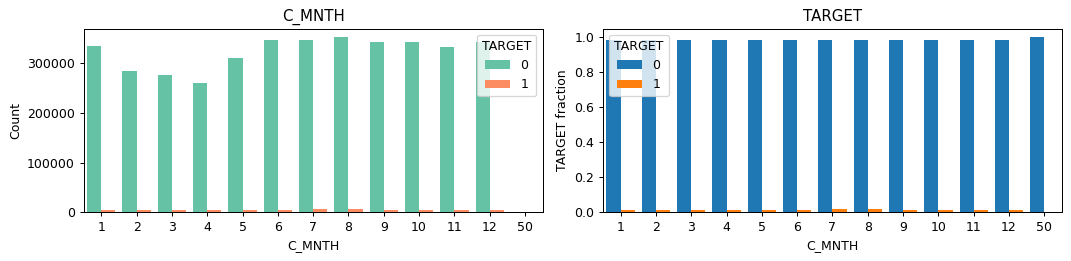

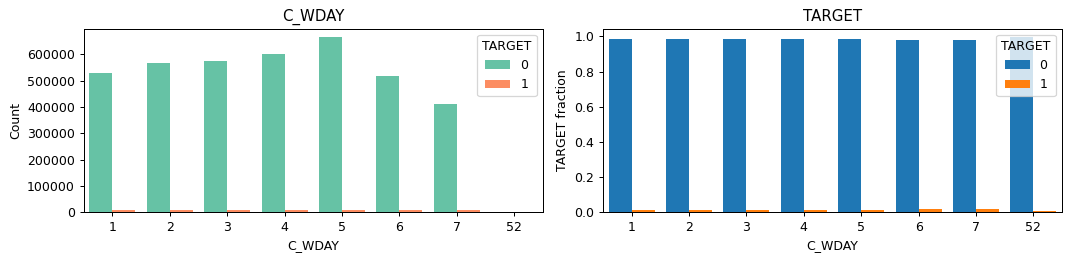

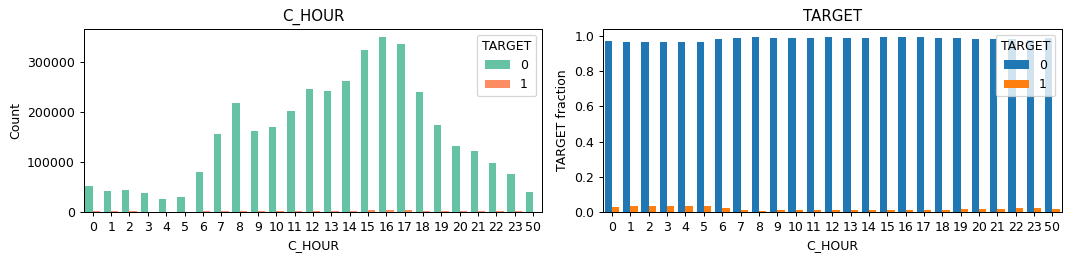

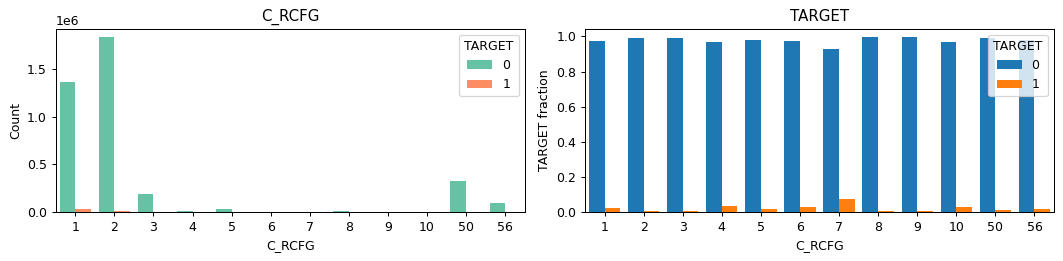

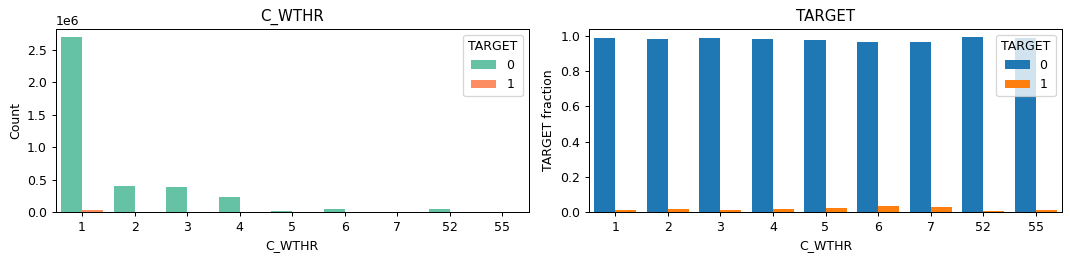

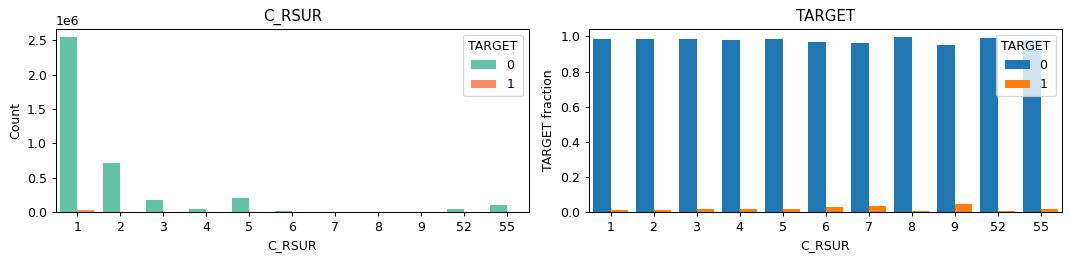

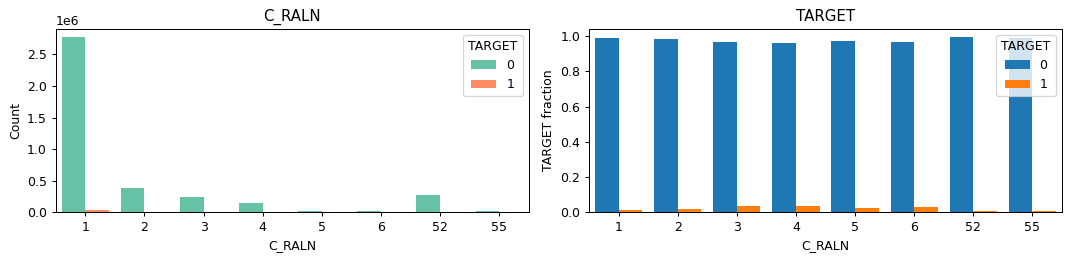

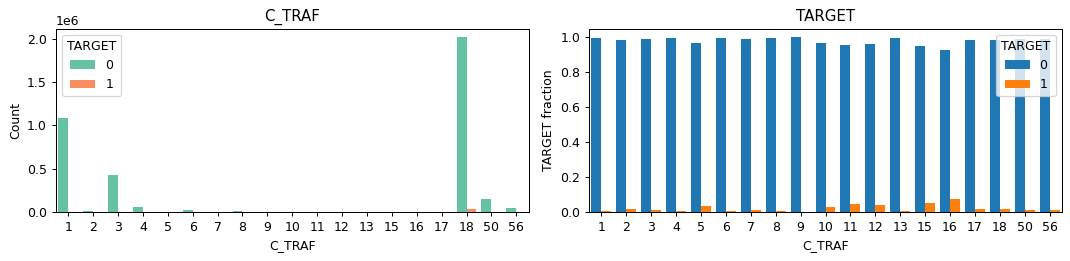

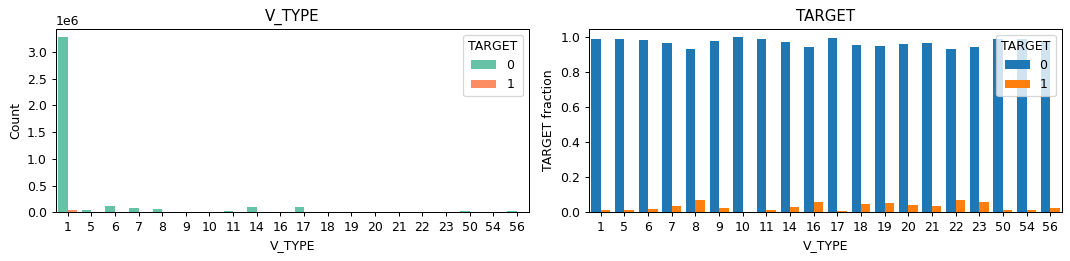

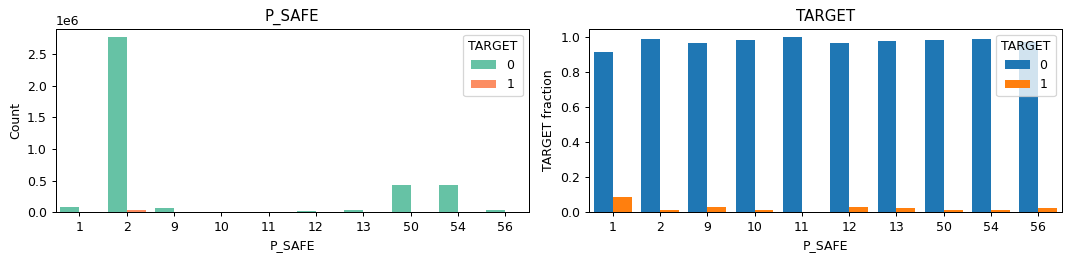

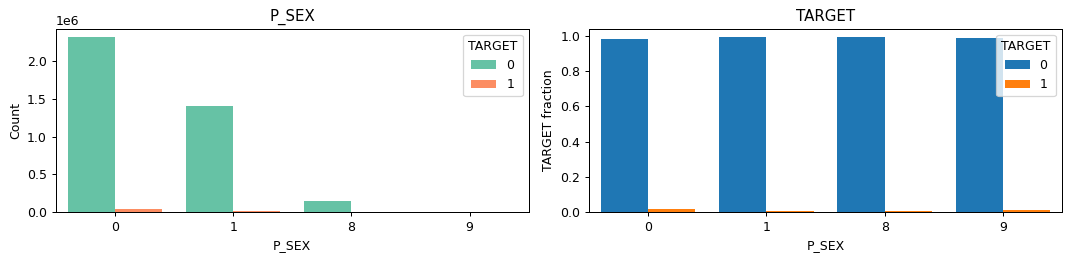

In [157]:
for col in df_cat:
    plot_feature(col, False)

In [ ]:
df_num = df_data[['V_YEAR', 'P_AGE', 'C_YEAR', 'PP_CAR']]

for col in df_num:
    plot_feature(col, True)

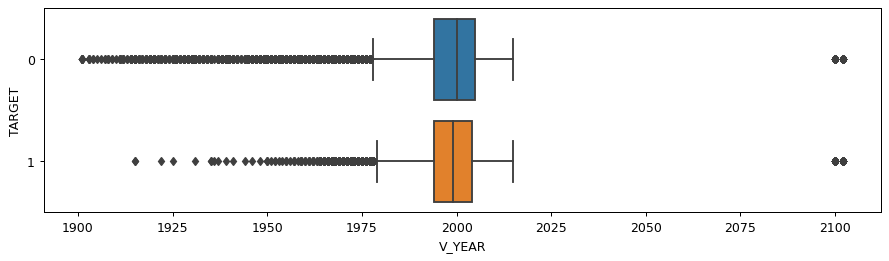

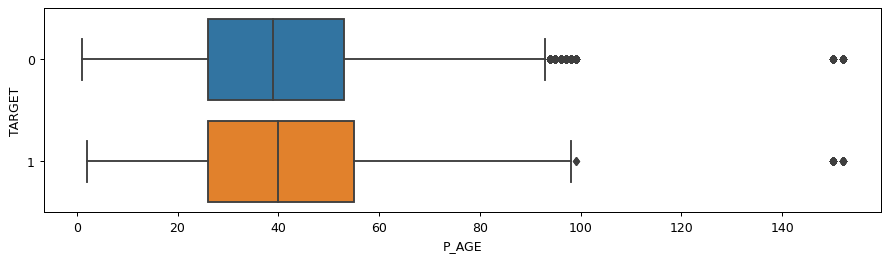

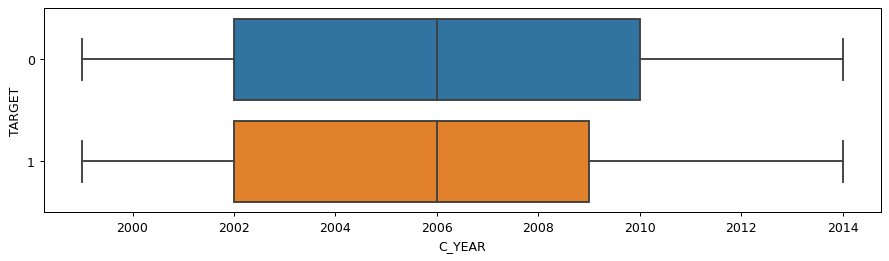

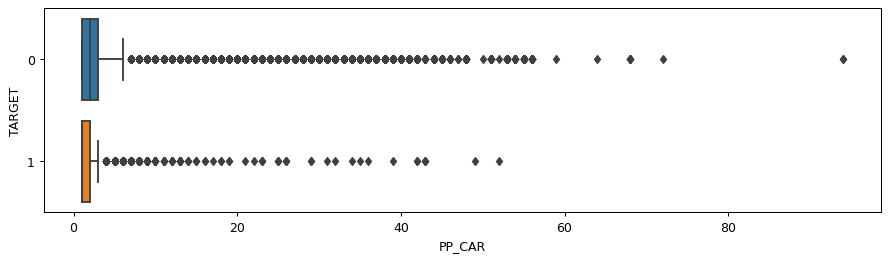

In [163]:
# Plot boxplots
for col in df_num:
    f, ax1 = plt.subplots(figsize=(12,3), dpi=90)
    ax = sns.boxplot(x=col, y='TARGET', data=df_data, orient="h")
    ax.get_yaxis().set_visible(True)

### Medidas de asociacion entre las variablies categoricas: cramers_v

In [ ]:
# Plot features associations

associations(df_data, nom_nom_assoc='cramer', figsize=(15, 15))

### Modelo base (decisión al azar)

Usaremos este estimador para comparar el resultado con el de nuestros modelos más avanzados. Para que los modelos que utilizaremos posteriormente sean válidos deben alcanzar una métrica superior a la de este estimador:

In [49]:
#librerias hay que moverlas
from sklearn.dummy import DummyClassifier
from collections import Counter

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [50]:
def print_binary_evaluation(y_true, y_pred):
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [51]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print_binary_evaluation(y_test, y_pred)

{'accuracy': 0.014567928906367404,
 'recall': 1.0,
 'precision': 0.014567928906367404,
 'f1_score': 0.02871750326677604}

Con este modelo 'tonto' le indicamos al algoritmo que sin tener en cuenta ningún patrón ni valor entre nuestras variables explicativas, prediga nuestra clase no mayoritaria, en este caso 1. Como observamos obtenemos una f1_score muy baja que nos idicarían que las predicciones no son fiables usando éste método 'al azar'. 